# Task 1

In [65]:
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
from tensorflow.keras.utils import plot_model
from tensorflow.keras import layers, models

In [66]:
df=pd.read_csv('sign_mnist_train.csv')
print(df.describe())
df

              label        pixel1        pixel2        pixel3        pixel4  \
count  27455.000000  27455.000000  27455.000000  27455.000000  27455.000000   
mean      12.318813    145.419377    148.500273    151.247714    153.546531   
std        7.287552     41.358555     39.942152     39.056286     38.595247   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        6.000000    121.000000    126.000000    130.000000    133.000000   
50%       13.000000    150.000000    153.000000    156.000000    158.000000   
75%       19.000000    174.000000    176.000000    178.000000    179.000000   
max       24.000000    255.000000    255.000000    255.000000    255.000000   

             pixel5        pixel6        pixel7        pixel8        pixel9  \
count  27455.000000  27455.000000  27455.000000  27455.000000  27455.000000   
mean     156.210891    158.411255    160.472154    162.339683    163.954799   
std       37.111165     36.125579     35.016392    

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27450,13,189,189,190,190,192,193,193,193,193,...,132,165,99,77,52,200,234,200,222,225
27451,23,151,154,157,158,160,161,163,164,166,...,198,198,198,198,198,196,195,195,195,194
27452,18,174,174,174,174,174,175,175,174,173,...,121,196,209,208,206,204,203,202,200,200
27453,17,177,181,184,185,187,189,190,191,191,...,119,56,27,58,102,79,47,64,87,93


In [67]:
model=models.Sequential()
model.add(layers.Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(128,activation='relu'))
model.add(layers.Dropout(0.28))
model.add(layers.Dense(26,activation='softmax'))
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [68]:
X=df.drop('label',axis=1).values
Y=df['label'].values
X=X/255.0
X=X.reshape(-1,28,28,1)
Y=keras.utils.to_categorical(Y,num_classes=26)
history=model.fit(X,Y,epochs=20,batch_size=64,validation_split=0.2)
print("training accuracy = ",history.history['accuracy'][-1])
print("training loss = ",history.history['loss'][-1])
print("validation accuracy = ",history.history['val_accuracy'][-1])
print("validation loss = ",history.history['val_loss'][-1])

Epoch 1/20
344/344 ━━━━━━━━━━━━━━━━━━━━ 21s 56ms/step - accuracy: 0.2735 - loss: 2.4509 - val_accuracy: 0.8805 - val_loss: 0.4535
Epoch 2/20
344/344 ━━━━━━━━━━━━━━━━━━━━ 23s 63ms/step - accuracy: 0.8189 - loss: 0.5529 - val_accuracy: 0.9801 - val_loss: 0.1269
Epoch 3/20
344/344 ━━━━━━━━━━━━━━━━━━━━ 40s 61ms/step - accuracy: 0.9293 - loss: 0.2336 - val_accuracy: 0.9936 - val_loss: 0.0414
Epoch 4/20
344/344 ━━━━━━━━━━━━━━━━━━━━ 19s 56ms/step - accuracy: 0.9594 - loss: 0.1297 - val_accuracy: 0.9982 - val_loss: 0.0160
Epoch 5/20
344/344 ━━━━━━━━━━━━━━━━━━━━ 20s 55ms/step - accuracy: 0.9789 - loss: 0.0772 - val_accuracy: 0.9996 - val_loss: 0.0063
Epoch 6/20
344/344 ━━━━━━━━━━━━━━━━━━━━ 23s 68ms/step - accuracy: 0.9843 - loss: 0.0546 - val_accuracy: 1.0000 - val_loss: 0.0051
Epoch 7/20
344/344 ━━━━━━━━━━━━━━━━━━━━ 37s 55ms/step - accuracy: 0.9865 - loss: 0.0441 - val_accuracy: 0.9989 - val_loss: 0.0049
Epoch 8/20
344/344 ━━━━━━━━━━━━━━━━━━━━ 21s 58ms/step - accuracy: 0.9876 - loss: 0.0428 - 

Text(0.5, 1.0, 'accuracy to iterations graphical analysis')

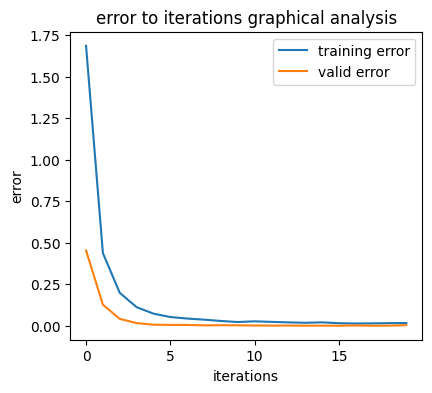

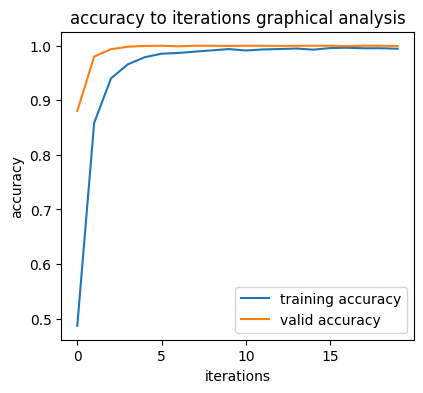

In [69]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(history.history['loss'],label='training error')
plt.plot(history.history['val_loss'],label='valid error')
plt.xlabel('iterations')
plt.ylabel('error')
plt.legend()
plt.title('error to iterations graphical analysis')
plt.figure(figsize=(10,4))
plt.subplot(1,2,2)
plt.plot(history.history['accuracy'],label='training accuracy')
plt.plot(history.history['val_accuracy'],label='valid accuracy')
plt.xlabel('iterations')
plt.ylabel('accuracy')
plt.legend()
plt.title('accuracy to iterations graphical analysis')

In [70]:
testerror,testaccuracy=model.evaluate(X,Y)
print("test error = ",testerror)
print("test accuracy = ",testaccuracy)

858/858 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - accuracy: 0.9991 - loss: 0.0032
test error =  0.0032865318935364485
test accuracy =  0.9992350935935974


In [83]:
with open('observations.txt', 'w') as file:
    file.write("Observations on Overfitting Issues in the Project\n\n")

    file.write("1. Overfitting Identification:\n")
    file.write("Overfitting was identified by observing a noticeable gap between the training and validation loss/accuracy curves, "
               "where the training performance was significantly better than validation performance. "
               "This indicates that the model is memorizing the training data rather than generalizing well to unseen data.\n\n")

    file.write("2. Handling Overfitting with CNN:\n")
    file.write("The CNN architecture addresses overfitting by using shared convolutional kernels, "
               "which extract features irrespective of their position in the image. "
               "This reduces the number of parameters and improves generalization.\n\n")

    file.write("3. Impact of Adding Another Dropout Layer:\n")
    file.write("Including an additional Dropout layer (e.g., with a rate of 0.4) after the convolutional layers could further reduce overfitting "
               "by randomly deactivating neurons during training. This prevents the network from relying too heavily on specific neurons "
               "and helps learning more robust features.\n\n")

    file.write("4. Shared Structure and Invariance Properties:\n")
    file.write("- Shared Structure Property: The shared weights of the convolutional layers ensure that the same kernel is applied across the image. "
               "This helps the model detect features like edges and textures regardless of their location.\n")
    file.write("- Invariance Property: Techniques like max-pooling give spatial invariance, allowing the network to focus on the presence of features "
               "rather than their exact location.\n\n")

    file.write("5. Recommendations:\n")
    file.write("- We can add another Dropout layer (rate 0.4) after the convolutional layers to address overfitting.\n")
    file.write("- We can use techniques like data augmentation (rotation, flipping, scaling) to improve the model's generalization.\n")
    file.write("- experminenting with different optimizer hyperparameters for further improvement in performance.\n")

print("observations saved to 'observations.txt'.")

observations saved to 'observations.txt'.


# Task 2

In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.metrics import mean_absolute_error, mean_squared_error,root_mean_squared_error

In [72]:
dtype_dict = {
    'Global_active_power': 'float64',
    'Global_reactive_power': 'float64',
    'Voltage': 'float64',
    'Global_intensity': 'float64',
    'Sub_metering_1': 'float64',
    'Sub_metering_2': 'float64',
    'Sub_metering_3': 'float64'
}
df1=pd.read_csv("household_power_consumption.txt",sep=';',dtype=dtype_dict,na_values='?')
df1['Datetime']=pd.to_datetime(df1['Date'] + ' ' + df1['Time'], format='%d/%m/%Y %H:%M:%S')
df1.drop(columns=['Date', 'Time'], inplace=True)
df1.dropna(subset=['Datetime'], inplace=True)
df1

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Datetime
0,4.216,0.418,234.84,18.4,0.0,1.0,17.0,2006-12-16 17:24:00
1,5.360,0.436,233.63,23.0,0.0,1.0,16.0,2006-12-16 17:25:00
2,5.374,0.498,233.29,23.0,0.0,2.0,17.0,2006-12-16 17:26:00
3,5.388,0.502,233.74,23.0,0.0,1.0,17.0,2006-12-16 17:27:00
4,3.666,0.528,235.68,15.8,0.0,1.0,17.0,2006-12-16 17:28:00
...,...,...,...,...,...,...,...,...
2075254,0.946,0.000,240.43,4.0,0.0,0.0,0.0,2010-11-26 20:58:00
2075255,0.944,0.000,240.00,4.0,0.0,0.0,0.0,2010-11-26 20:59:00
2075256,0.938,0.000,239.82,3.8,0.0,0.0,0.0,2010-11-26 21:00:00
2075257,0.934,0.000,239.70,3.8,0.0,0.0,0.0,2010-11-26 21:01:00


In [73]:
df1.set_index('Datetime', inplace=True)
daily_data= df1['Global_active_power'].resample('D').sum()
daily_data= daily_data.to_frame(name='daily_power')
scaler=StandardScaler()
daily_data=scaler.fit_transform(daily_data)
daily_data

array([[-0.55447782],
       [ 2.98035277],
       [ 1.05737981],
       ...,
       [ 0.39688847],
       [-0.19474017],
       [-0.10246734]])

In [74]:
def create_sequences(data, window_size):
    sequences=[]
    labels=[]
    for i in range(len(data)-window_size):
        seq= data[i:i+window_size]
        label= data[i+window_size]
        sequences.append(seq)
        labels.append(label)
    return np.array(sequences), np.array(labels)

In [75]:
window_size= 7
X,Y =create_sequences(daily_data, window_size)
X=X.reshape((X.shape[0], X.shape[1], 1))
X

array([[[-0.55447782],
        [ 2.98035277],
        [ 1.05737981],
        ...,
        [ 1.09290501],
        [ 0.26785559],
        [ 1.28022178]],

       [[ 2.98035277],
        [ 1.05737981],
        [ 0.1861324 ],
        ...,
        [ 0.26785559],
        [ 1.28022178],
        [ 5.22142231]],

       [[ 1.05737981],
        [ 0.1861324 ],
        [ 1.09290501],
        ...,
        [ 1.28022178],
        [ 5.22142231],
        [ 1.61838372]],

       ...,

       [[ 0.04974556],
        [ 0.16337695],
        [ 0.03089559],
        ...,
        [-1.05403133],
        [ 0.79438441],
        [ 0.04245967]],

       [[ 0.16337695],
        [ 0.03089559],
        [ 1.04632781],
        ...,
        [ 0.79438441],
        [ 0.04245967],
        [ 0.39688847]],

       [[ 0.03089559],
        [ 1.04632781],
        [-1.05403133],
        ...,
        [ 0.04245967],
        [ 0.39688847],
        [-0.19474017]]])

In [76]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=1314)
model = Sequential([LSTM(100, activation='relu', input_shape=(X.shape[1], 1)),Dense(1)])
model.compile(optimizer='adamW', loss='mse')

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [77]:
history=model.fit(x_train, y_train, epochs=20, batch_size=64, validation_data=(x_test, y_test))

Epoch 1/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 3s 46ms/step - loss: 1.0169 - val_loss: 0.7414
Epoch 2/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.6666 - val_loss: 0.6689
Epoch 3/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.5340 - val_loss: 0.6213
Epoch 4/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.5578 - val_loss: 0.6172
Epoch 5/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.4701 - val_loss: 0.6146
Epoch 6/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.5484 - val_loss: 0.6052
Epoch 7/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.4663 - val_loss: 0.5913
Epoch 8/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.4861 - val_loss: 0.5850
Epoch 9/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.5498 - val_loss: 0.5887
Epoch 10/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.5245 - val_loss: 0.5916
Epoch 11/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.4856 - val_loss: 0.5947
Epoch 12/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.5

45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


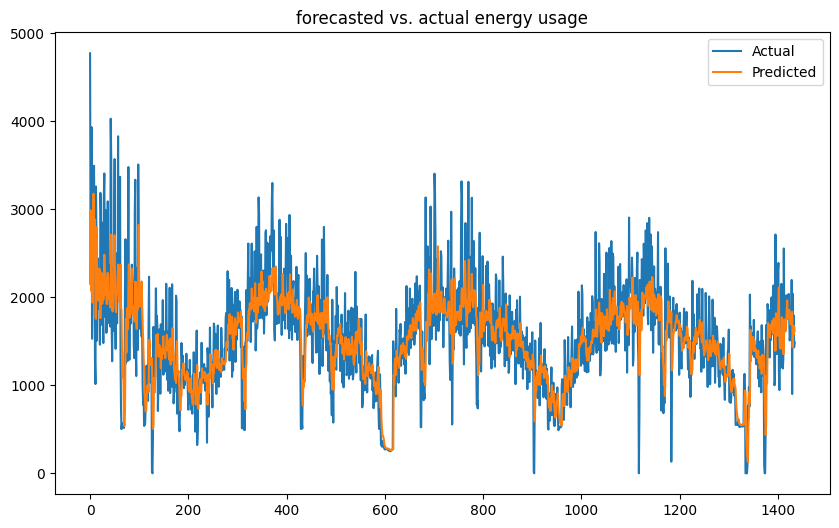

In [80]:
predictions=model.predict(X)
y_true=scaler.inverse_transform(y.reshape(-1, 1))
y_pred=scaler.inverse_transform(predictions)
plt.figure(figsize=(10,6))
plt.plot(y_true,label='Actual')
plt.plot(y_pred,label='Predicted')
plt.legend()
plt.title('forecasted vs. actual energy usage')
plt.show()

In [81]:
train_loss=model.evaluate(x_train, y_train, verbose=0)
test_loss=model.evaluate(x_test, y_test, verbose=0)
print(f"Train  Loss: {train_loss}")
print(f"Test Loss: {test_loss}")
y_pred=model.predict(x_test)
y_true=y_test
test_mae=mean_absolute_error(y_true,y_pred)
print(f" MAE: {test_mae}")
test_rmse=root_mean_squared_error(y_true,y_pred)
print(f" RMSE: {test_rmse}")

Train  Loss: 0.48245489597320557
Test Loss: 0.5628889799118042
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
 MAE: 0.5355649396497226
 RMSE: 0.750259243389589
